In [1]:
library(forecast)
library(TSA)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Registered S3 methods overwritten by 'TSA':
  method       from    
  fitted.Arima forecast
  plot.Arima   forecast


Attaching package: 'TSA'


The following objects are masked from 'package:stats':

    acf, arima


The following object is masked from 'package:utils':

    tar




In [2]:
data(larain)
is.ts(larain)

[1] TRUE

In [3]:
start(larain)
end(larain)

[1] 1878    1

[1] 1992    1

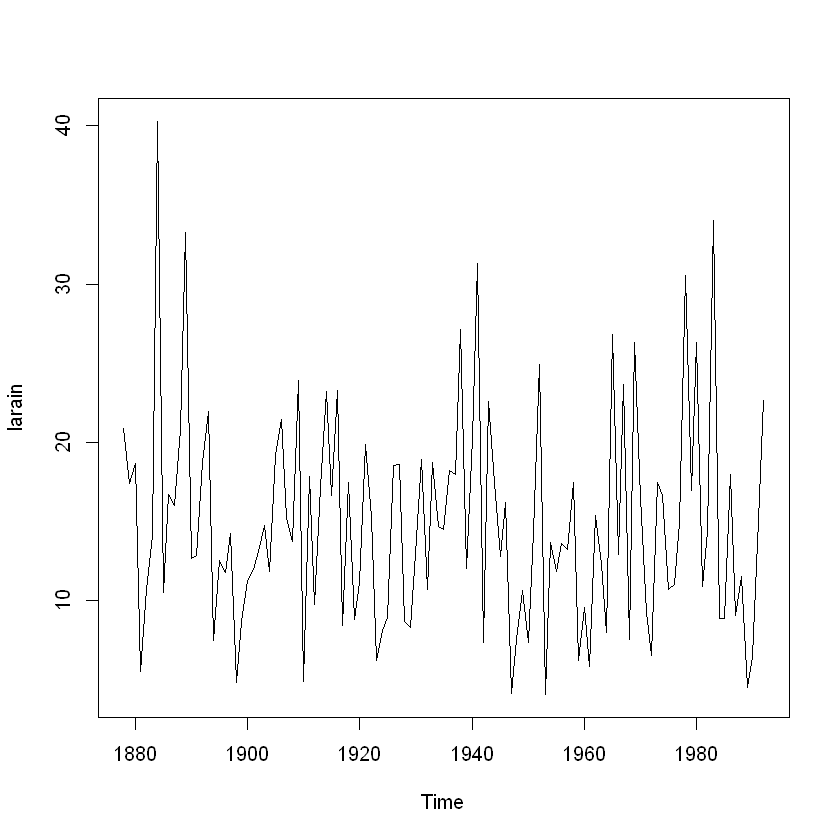

In [4]:
plot(larain)

In [5]:
# 단순지수평활법
ses_fit<-ses(larain, initial='optimal')
summary(ses_fit)


Forecast method: Simple exponential smoothing

Model Information:
Simple exponential smoothing 

Call:
 ses(y = larain, initial = "optimal") 

  Smoothing parameters:
    alpha = 1e-04 

  Initial states:
    l = 14.8875 

  sigma:  6.9115

      AIC      AICc       BIC 
 994.2823  994.4985 1002.5171 

Error measures:
                        ME    RMSE      MAE       MPE     MAPE      MASE
Training set -0.0006018054 6.85113 5.322272 -25.26647 47.23021 0.6995803
                    ACF1
Training set -0.03272106

Forecasts:
     Point Forecast    Lo 80   Hi 80    Lo 95    Hi 95
1993       14.88746 6.030027 23.7449 1.341184 28.43374
1994       14.88746 6.030027 23.7449 1.341184 28.43374
1995       14.88746 6.030027 23.7449 1.341184 28.43374
1996       14.88746 6.030027 23.7449 1.341184 28.43374
1997       14.88746 6.030027 23.7449 1.341184 28.43374
1998       14.88746 6.030027 23.7449 1.341184 28.43374
1999       14.88746 6.030027 23.7449 1.341184 28.43374
2000       14.88746 6.030027 23

In [6]:
# 홀트선형 vs 홀트선형(감쇠)
holt_fit<-holt(larain)
holt_fit_d<-holt(larain, damped=TRUE)
summary(holt_fit)
summary(holt_fit_d) # 감쇠추세법 RMSE가 더 낮음


Forecast method: Holt's method

Model Information:
Holt's method 

Call:
 holt(y = larain) 

  Smoothing parameters:
    alpha = 0.0139 
    beta  = 1e-04 

  Initial states:
    l = 18.149 
    b = -0.0323 

  sigma:  7.0831

     AIC     AICc      BIC 
1001.871 1002.421 1015.596 

Error measures:
                     ME     RMSE      MAE      MPE     MAPE      MASE
Training set -0.3574963 6.958864 5.436348 -27.8063 48.68754 0.7145749
                    ACF1
Training set -0.01859946

Forecasts:
     Point Forecast    Lo 80    Hi 80      Lo 95    Hi 95
1993       13.19606 4.118655 22.27347 -0.6866352 27.07876
1994       13.15970 4.081398 22.23800 -0.7243662 27.04377
1995       13.12334 4.044128 22.20255 -0.7621166 27.00879
1996       13.08698 4.006845 22.16711 -0.7998865 26.97384
1997       13.05061 3.969549 22.13168 -0.8376762 26.93891
1998       13.01425 3.932241 22.09626 -0.8754857 26.90399
1999       12.97789 3.894919 22.06086 -0.9133151 26.86910
2000       12.94153 3.857584 22.0

In [8]:
# ****연도별 데이터는 홀트윈터스모형 적용안됨!

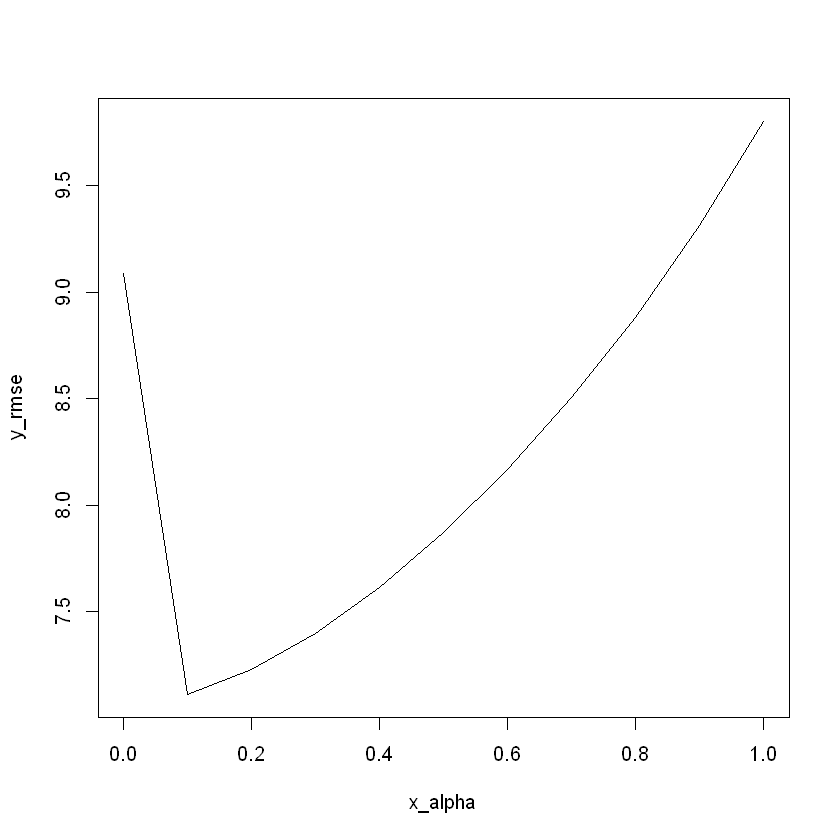

In [11]:
# 단순지수평활법의 최적 파라미터 값 찾아보기

x_alpha<-c(0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1)
y_rmse<-c()
for (a in x_alpha){
    ses<-ses(larain, initial='simple', alpha=a)
    ses_rmse<-sqrt(mean((ses$residuals)^2))
    y_rmse<-append(y_rmse, ses_rmse)
}
plot(x=x_alpha, y=y_rmse, type='l')

In [14]:
train_d<-window(larain, start=1878, end=1986)
test_d<-window(larain, start=1987)
train_d
test_d

A Time Series:
  [1] 20.86 17.41 18.65  5.53 10.74 14.14 40.29 10.53 16.72 16.02 20.82 33.26
 [13] 12.69 12.84 18.72 21.96  7.51 12.55 11.80 14.28  4.83  8.69 11.30 11.96
 [25] 13.12 14.77 11.88 19.19 21.46 15.30 13.74 23.92  4.89 17.85  9.78 17.17
 [37] 23.21 16.67 23.29  8.45 17.49  8.82 11.18 19.85 15.27  6.25  8.11  8.94
 [49] 18.56 18.63  8.69  8.32 13.02 18.93 10.72 18.76 14.67 14.49 18.24 17.97
 [61] 27.16 12.06 20.26 31.28  7.40 22.57 17.45 12.78 16.22  4.13  7.59 10.63
 [73]  7.38 14.33 24.95  4.08 13.69 11.89 13.62 13.24 17.49  6.23  9.57  5.83
 [85] 15.37 12.31  7.98 26.81 12.91 23.66  7.58 26.32 16.54  9.26  6.54 17.45
 [97] 16.69 10.70 11.01 14.97 30.57 17.00 26.33 10.92 14.41 34.04  8.90  8.92
[109] 18.00

A Time Series:
[1]  9.11 11.57  4.56  6.49 15.07 22.65

In [16]:
# ses vs holt선형감쇠추세법 누가 더 적합한가?
train_ses_fit<-ses(train_d, initial='optimal')
train_holt_d_fit<-holt(train_d, damped=TRUE)

summary(train_ses_fit) #RMSE값이 미세하게 더 낮음!
summary(train_holt_d_fit)


Forecast method: Simple exponential smoothing

Model Information:
Simple exponential smoothing 

Call:
 ses(y = train_d, initial = "optimal") 

  Smoothing parameters:
    alpha = 1e-04 

  Initial states:
    l = 15.0699 

  sigma:  6.9122

     AIC     AICc      BIC 
936.7957 937.0242 944.8697 

Error measures:
                       ME     RMSE      MAE       MPE     MAPE      MASE
Training set 0.0002959376 6.848509 5.307135 -24.36977 46.08188 0.6898687
                    ACF1
Training set -0.05882245

Forecasts:
     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
1987       15.06989 6.211525 23.92825 1.522191 28.61758
1988       15.06989 6.211525 23.92825 1.522191 28.61758
1989       15.06989 6.211525 23.92825 1.522190 28.61758
1990       15.06989 6.211524 23.92825 1.522190 28.61758
1991       15.06989 6.211524 23.92825 1.522190 28.61758
1992       15.06989 6.211524 23.92825 1.522190 28.61758
1993       15.06989 6.211524 23.92825 1.522190 28.61758
1994       15.06989 6.211524

ETS(A,N,N) 

Call:
 ets(y = train_d, model = "ANN") 

  Smoothing parameters:
    alpha = 1e-04 

  Initial states:
    l = 15.0696 

  sigma:  6.9122

     AIC     AICc      BIC 
936.7957 937.0242 944.8697 

Training set error measures:
                       ME     RMSE      MAE      MPE     MAPE      MASE
Training set 0.0006191166 6.848509 5.307096 -24.3671 46.08063 0.6898637
                    ACF1
Training set -0.05882245
ETS(M,N,N) 

Call:
 ets(y = train_d, model = "MNN") 

  Smoothing parameters:
    alpha = 1e-04 

  Initial states:
    l = 15.071 

  sigma:  0.4586

     AIC     AICc      BIC 
936.7998 937.0284 944.8738 

Training set error measures:
                        ME     RMSE      MAE       MPE     MAPE      MASE
Training set -0.0007792043 6.848509 5.307263 -24.37864 46.08602 0.6898854
                    ACF1
Training set -0.05882248
ETS(M,N,N) 

Call:
 ets(y = train_d, model = "MNN") 

  Smoothing parameters:
    alpha = 1e-04 

  Initial states:
    l = 15.071 



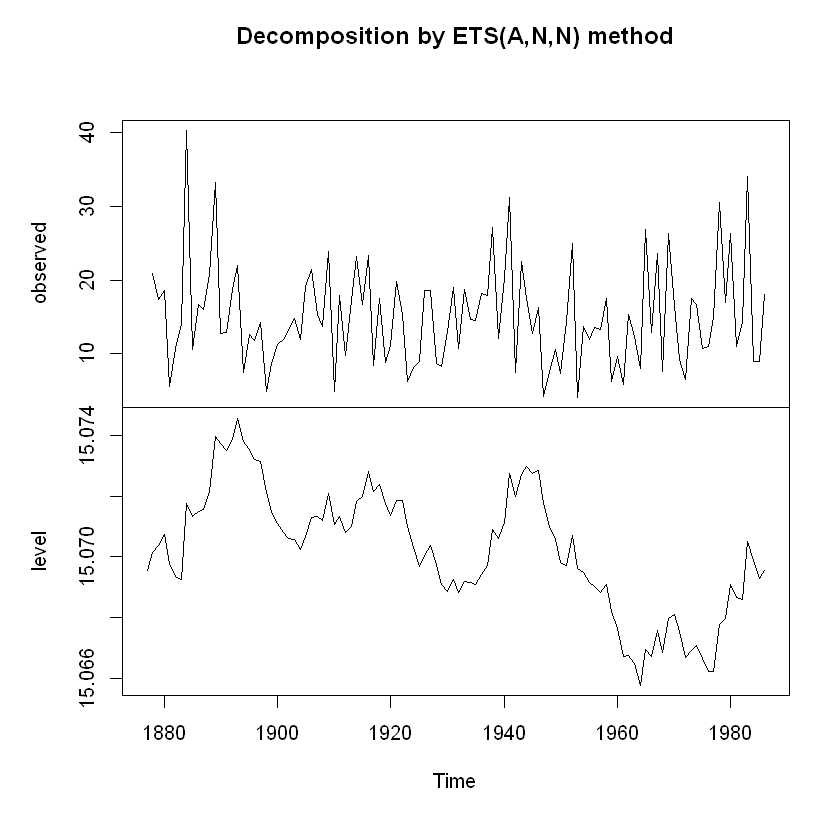

In [23]:
# ETS모형 중 적합한 거 찾기
# 가법,승법 error = 적합된 값을 보정하는 것!
# 추세성분 -> 없으므로 'N'


ets_1<-ets(train_d, model='ANN')
ets_2<-ets(train_d, model='MNN')
ets_3<-ets(train_d, model='MNN')
ets_4<-ets(train_d, model='ZZZ')


summary(ets_1)
summary(ets_2)
summary(ets_3)
summary(ets_4)

plot(ets_1)

In [27]:
for_ets_1<-forecast(ets_1, h=6)
for_ets_2<-forecast(ets_2, h=6)
for_ets_3<-forecast(ets_3, h=6)
for_ets_4<-forecast(ets_4, h=6)

for_ets_1$fitted
for_ets_2$fitted
for_ets_3$fitted
for_ets_4$fitted

A Time Series:
  [1] 15.06956 15.07014 15.07037 15.07073 15.06978 15.06934 15.06925 15.07177
  [9] 15.07132 15.07148 15.07158 15.07215 15.07397 15.07373 15.07351 15.07387
 [17] 15.07456 15.07381 15.07355 15.07323 15.07315 15.07212 15.07149 15.07111
 [25] 15.07080 15.07060 15.07057 15.07025 15.07066 15.07130 15.07133 15.07119
 [33] 15.07208 15.07106 15.07134 15.07081 15.07102 15.07183 15.07199 15.07281
 [41] 15.07215 15.07239 15.07177 15.07138 15.07186 15.07188 15.07099 15.07030
 [49] 15.06969 15.07003 15.07039 15.06975 15.06908 15.06887 15.06926 15.06882
 [57] 15.06919 15.06915 15.06910 15.06941 15.06970 15.07091 15.07061 15.07113
 [65] 15.07275 15.07198 15.07273 15.07297 15.07274 15.07286 15.07176 15.07101
 [73] 15.07057 15.06980 15.06973 15.07071 15.06962 15.06948 15.06916 15.06901
 [81] 15.06883 15.06907 15.06819 15.06764 15.06672 15.06675 15.06647 15.06576
 [89] 15.06694 15.06672 15.06758 15.06683 15.06796 15.06810 15.06752 15.06667
 [97] 15.06691 15.06707 15.06663 15.06623 15.06622 15.06777 15.06796 15.06909
[105] 15.06867 15.06861 15.07051 15.06989 15.06927

A Time Series:
  [1] 15.07096 15.07154 15.07178 15.07214 15.07118 15.07075 15.07065 15.07318
  [9] 15.07272 15.07289 15.07298 15.07356 15.07538 15.07514 15.07492 15.07528
 [17] 15.07597 15.07521 15.07496 15.07463 15.07455 15.07353 15.07289 15.07251
 [25] 15.07220 15.07200 15.07197 15.07165 15.07207 15.07271 15.07273 15.07260
 [33] 15.07348 15.07246 15.07274 15.07221 15.07242 15.07324 15.07339 15.07422
 [41] 15.07355 15.07380 15.07317 15.07278 15.07326 15.07328 15.07239 15.07170
 [49] 15.07108 15.07143 15.07179 15.07115 15.07047 15.07027 15.07066 15.07022
 [57] 15.07059 15.07055 15.07049 15.07081 15.07110 15.07231 15.07201 15.07253
 [65] 15.07415 15.07338 15.07413 15.07437 15.07414 15.07425 15.07316 15.07241
 [73] 15.07197 15.07120 15.07112 15.07211 15.07101 15.07087 15.07055 15.07041
 [81] 15.07022 15.07047 15.06958 15.06903 15.06811 15.06814 15.06786 15.06715
 [89] 15.06833 15.06811 15.06897 15.06822 15.06935 15.06949 15.06891 15.06806
 [97] 15.06830 15.06846 15.06802 15.06762 15.06761 15.06916 15.06935 15.07048
[105] 15.07006 15.07000 15.07190 15.07128 15.07066

A Time Series:
  [1] 15.07096 15.07154 15.07178 15.07214 15.07118 15.07075 15.07065 15.07318
  [9] 15.07272 15.07289 15.07298 15.07356 15.07538 15.07514 15.07492 15.07528
 [17] 15.07597 15.07521 15.07496 15.07463 15.07455 15.07353 15.07289 15.07251
 [25] 15.07220 15.07200 15.07197 15.07165 15.07207 15.07271 15.07273 15.07260
 [33] 15.07348 15.07246 15.07274 15.07221 15.07242 15.07324 15.07339 15.07422
 [41] 15.07355 15.07380 15.07317 15.07278 15.07326 15.07328 15.07239 15.07170
 [49] 15.07108 15.07143 15.07179 15.07115 15.07047 15.07027 15.07066 15.07022
 [57] 15.07059 15.07055 15.07049 15.07081 15.07110 15.07231 15.07201 15.07253
 [65] 15.07415 15.07338 15.07413 15.07437 15.07414 15.07425 15.07316 15.07241
 [73] 15.07197 15.07120 15.07112 15.07211 15.07101 15.07087 15.07055 15.07041
 [81] 15.07022 15.07047 15.06958 15.06903 15.06811 15.06814 15.06786 15.06715
 [89] 15.06833 15.06811 15.06897 15.06822 15.06935 15.06949 15.06891 15.06806
 [97] 15.06830 15.06846 15.06802 15.06762 15.06761 15.06916 15.06935 15.07048
[105] 15.07006 15.07000 15.07190 15.07128 15.07066

A Time Series:
  [1] 15.06956 15.07014 15.07037 15.07073 15.06978 15.06934 15.06925 15.07177
  [9] 15.07132 15.07148 15.07158 15.07215 15.07397 15.07373 15.07351 15.07387
 [17] 15.07456 15.07381 15.07355 15.07323 15.07315 15.07212 15.07149 15.07111
 [25] 15.07080 15.07060 15.07057 15.07025 15.07066 15.07130 15.07133 15.07119
 [33] 15.07208 15.07106 15.07134 15.07081 15.07102 15.07183 15.07199 15.07281
 [41] 15.07215 15.07239 15.07177 15.07138 15.07186 15.07188 15.07099 15.07030
 [49] 15.06969 15.07003 15.07039 15.06975 15.06908 15.06887 15.06926 15.06882
 [57] 15.06919 15.06915 15.06910 15.06941 15.06970 15.07091 15.07061 15.07113
 [65] 15.07275 15.07198 15.07273 15.07297 15.07274 15.07286 15.07176 15.07101
 [73] 15.07057 15.06980 15.06973 15.07071 15.06962 15.06948 15.06916 15.06901
 [81] 15.06883 15.06907 15.06819 15.06764 15.06672 15.06675 15.06647 15.06576
 [89] 15.06694 15.06672 15.06758 15.06683 15.06796 15.06810 15.06752 15.06667
 [97] 15.06691 15.06707 15.06663 15.06623 15.06622 15.06777 15.06796 15.06909
[105] 15.06867 15.06861 15.07051 15.06989 15.06927

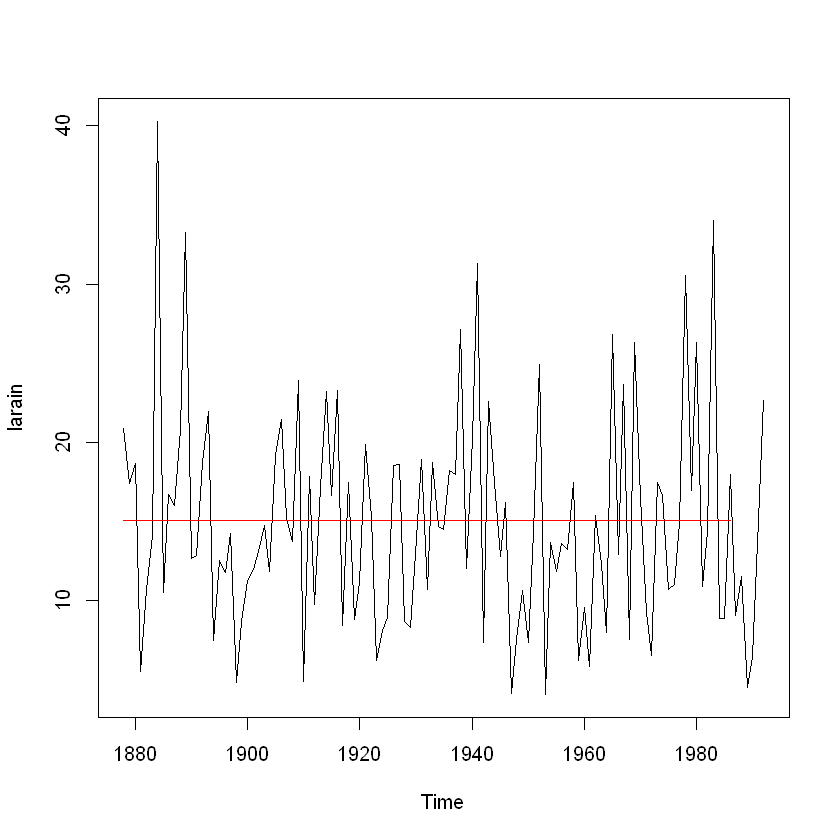

In [26]:
# ets모형 RMSE값이 다 똑같음
# ets_1으로 원데이터,적합값, 예측데이터 시각화

plot(larain)
lines(for_ets_1$fitted, col='red')

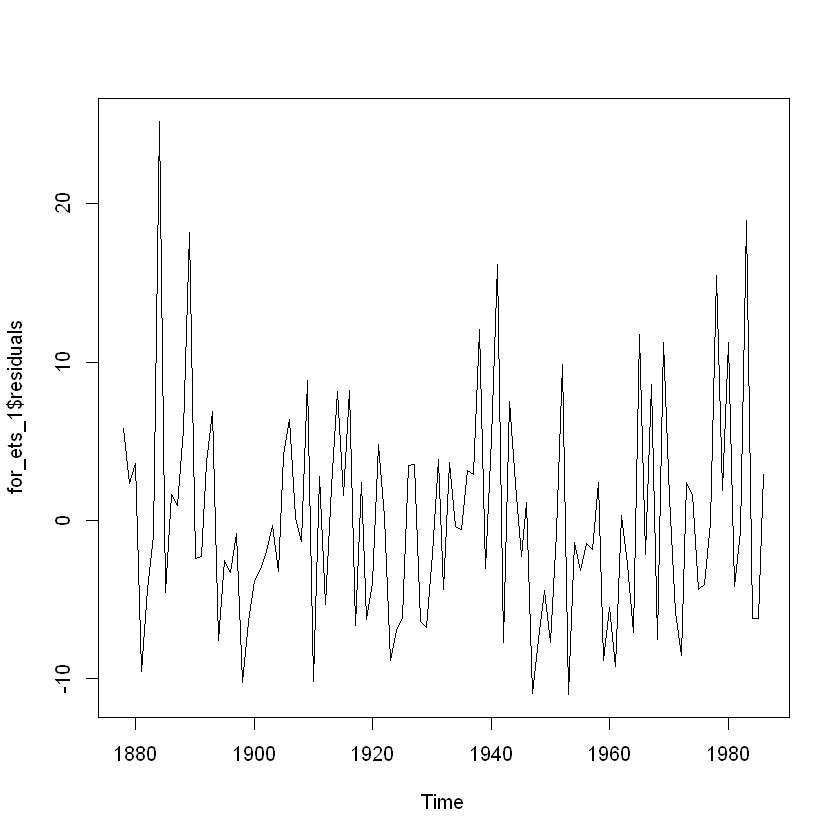

In [28]:
plot(for_ets_1$residuals)

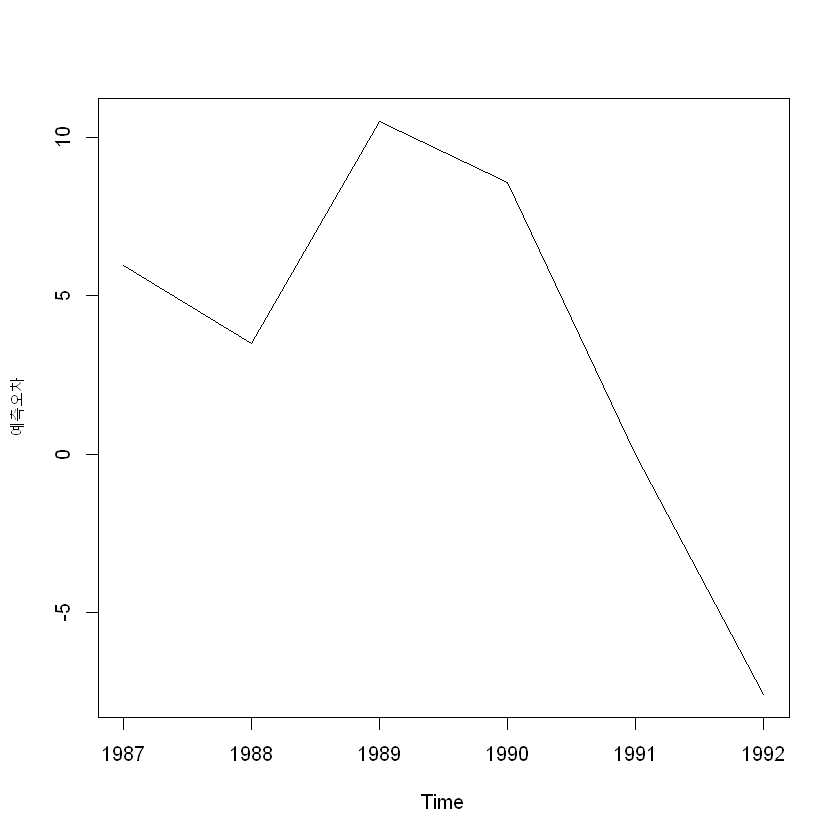

In [31]:
plot(for_ets_1$mean-test_d, ylab='예측오차')